In [2]:
# subway-data-2.csv 파일의 데이터를 읽어서 리스트로 구성
# csv 모듈 사용
# 숫자는 숫자형으로 변경 ( 4번째 ~ 끝에서 2번째)
# 주의 : 제목 행 없음

import csv

rows = []
with open('data-files/subway-data-2.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)

    for row in reader:
        for i in range(4, len(row) - 1):
            row[i] = int(row[i].replace(',', ''))
        
        rows.append(row)

rows[0][:5]

['2025-02', '1호선', '0150', '서울역', 587]

In [ ]:
# 리스트에 포함된 모든 수치형 데이터의 합 계산
a = [1, 2, 3, 4, 5]
sum(a) # 

15

In [10]:
# 이용객수가 가장 많은 지하철역 찾기
# 이용객수 계산 : 모든 시간의 (승차인원 + 하차인원)의 합 ( 각 행의 4번째 데이터 ~ 뒤에서 2번째 데이터 )

rows = []
with open('data-files/subway-data-2.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)

    for row in reader:
        for i in range(4, len(row) - 1):
            row[i] = int(row[i].replace(',', ''))
        
        rows.append(row)

# --------------------------------------------------------------------------

max_row = rows[0]
min_row = rows[0]

for row in rows:
    # print(row)
    current_sum = sum(row[4:-1]) # 현재 행의 총 승하차 인원
    # print(current_sum)
    max_sum = sum(max_row[4:-1]) # 이전 행들 중 총 승하차 인원이 가장 많은 행의 인원
    min_sum = sum(min_row[4:-1]) # 이전 행들 중 총 승하차 인원이 가장 적은 행의 인원

    if max_sum < current_sum: # 현재 행의 총 승하차 인원이 이전의 최대 총 승하차 인원보다 많은 경우
        max_row = row
    if current_sum > 100000 and min_sum > current_sum: # 현재 행의 총 승하차 인원이 이전의 최소 총 승하차 인원보다 적은 경우
        min_row = row

print(max_row[:4], sum(max_row[4:-1]))
print(min_row[:4], sum(min_row[4:-1]))
    

['2025-02', '2호선', '0222', '강남'] 4484564
['2025-02', '7호선', '2711', '장암'] 100565


In [ ]:
a = [1, 5, 4, 2, 3]
print( min(a), max(a) )
a.sort()
print( a )
a.reverse()
print( a )
print(a.index(3)) # 3의 위치
print(a.index( min(a) )) # 최소값의 위치

1 5
[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]
2
4


In [2]:
# 이용객수가 많은 상위 10개 지하철역 찾기
# 이용객수 계산 : 모든 시간의 (승차인원 + 하차인원)의 합 ( 각 행의 4번째 데이터 ~ 뒤에서 2번째 데이터 )
import csv 

rows = []
with open('data-files/subway-data-2.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)

    for row in reader:
        for i in range(4, len(row) - 1):
            row[i] = int(row[i].replace(',', ''))
        
        rows.append(row)

# --------------------------------------------------------------------------

max_rows = [ ] # 이용객수가 많은 행 저장할 리스트
max_values = [ ] # 이용객수가 많은 행의 이용객수를 저장할 리스트

for row in rows:
    if len(max_rows) < 10: # 아직 10개의 데이터가 채워지지 않았다면
        max_rows.append(row)
        max_values.append( sum(row[4:-1]) )
    else:
        current_sum = sum(row[4:-1]) # 현재 행의 총 승하차 인원
        min_value = min(max_values) # 상위 승하차 합계 인원 목록에서 최소값 찾기
        if min_value < current_sum: # 현재 행의 승하차 합계 인원 위의 최소값보다 크다면 (->교체 필요)
            min_index = max_values.index(min_value) # 기존 목록에서 최소값이 있는 위치 (교체 대상 위치)
            max_values[min_index] = current_sum # 현재 총승객수를 교체 대상 위치에 적용
            max_rows[min_index] = row # 현재 행을 최대값 행 목록의 교체 대상 위치에 적용

for mr in max_rows:
    print(mr[:4], sum(mr[4:-1]))

['2025-02', '1호선', '0150', '서울역'] 3701324
['2025-02', '2호선', '0221', '역삼'] 2858082
['2025-02', '2호선', '0232', '구로디지털단지'] 3087645
['2025-02', '2호선', '0216', '잠실(송파구청)'] 4382988
['2025-02', '2호선', '0230', '신림'] 2983763
['2025-02', '2호선', '0234', '신도림'] 2785625
['2025-02', '2호선', '0222', '강남'] 4484564
['2025-02', '2호선', '0219', '삼성(무역센터)'] 2934134
['2025-02', '2호선', '0239', '홍대입구'] 4257873
['2025-02', '2호선', '0220', '선릉'] 2859695


In [ ]:
# 리스트에서 2칸씩 이동하면서 2개의 합을 더하는 코드 테스트
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b1 = []
for i in range(0, len(a), 2): # 0, 2, 4, 6, 8 (위치번호)
    b1.append(a[i] + a[i+1]) # a[0] + a[0+1], a[2] + a[2+1]
print(b1)

print(a[::2]) # slicing : 시작위치:끝위치:한번에이동할양

b2 = [ a[i] + a[i+1] for i in range(0, len(a), 2) ] # 위 반복문을 comprehension 형식으로 변경
print(b2)

# 0 ~ 24로 되어 있는 시간 목록을 4부터 시작하는 목록으로 변경
# 4 ~ 23, 0 ~ 3
print( list(range(4, 24)) ) # 4 ~ 23 목록
print( list(range(0, 4)) ) # 0 ~ 3 목록
print( list(range(4, 24)) + list(range(0, 4)) ) # 두 목록을 하나의 목록으로 합치기


[3, 7, 11, 15, 19]
[1, 3, 5, 7, 9]
[3, 7, 11, 15, 19]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3]


['2025-02', '2호선', '0232', '구로디지털단지', 228, 11, 33718, 4098, 47533, 18431, 128934, 77478, 173819, 220003, 105834, 132504, 64607, 55548, 58588, 43307, 66592, 48344, 66874, 61334, 61068, 58704, 65807, 63770, 78360, 77177, 130951, 103997, 199787, 154047, 97918, 126222, 61226, 82021, 50167, 78498, 38610, 74514, 18183, 42399, 3377, 13008, 2, 47, 0, 0, 0, 0, '2025-03-03 16:39:16']
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3]


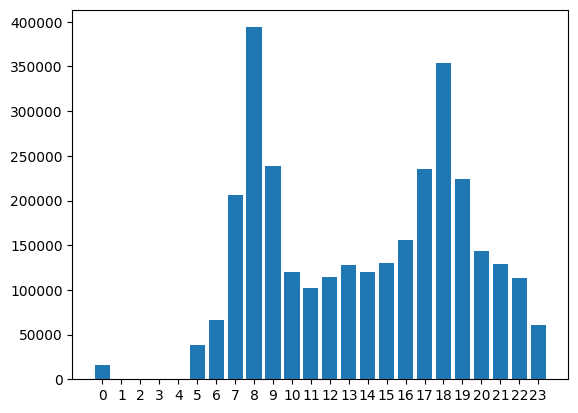

In [27]:
# 특정 역의 각 시간대별 이용객수를 그래프로 표현 (영등포역으로 테스트)
# 시간대별 이용객수 계산 : 각 시간의 (승차인원 + 하차인원)의 합 ( 각 행의 4번째 데이터 ~ 뒤에서 2번째 데이터 )
#                       위의 반복문 테스트 코드 참고
import csv 

rows = []
with open('data-files/subway-data-2.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)

    for row in reader:
        for i in range(4, len(row) - 1):
            row[i] = int(row[i].replace(',', ''))
        
        rows.append(row)

# --------------------------------------------------------------------------

# 영등포역 데이터 찾기
selected_row = None
for row in rows:
    if row[3] == '구로디지털단지':
        selected_row = row
        break

if selected_row != None:
    print(selected_row)
else:
    print("해당 역이 없습니다.")

# 시간대별 이용객수 계산 -> 리스트에 저장 1
counts1 = []
for i in range(4, len(row)-1, 2):
    counts1.append(row[i] + row[i+1])
    # counts1.append(row[i])

# 시간대별 이용객수 계산 -> 리스트에 저장 2
counts2 = [ row[i] + row[i+1] for i in range(4, len(row)-1, 2) ]
# counts2 = [ row[i] for i in range(4, len(row)-1, 2) ]

# 시간대별 이용객수를 막대그래프로 표시
import matplotlib.pyplot as plt

hours = list(range(4, 24)) + list(range(0, 4))
print(hours)
plt.bar(hours, counts2)
plt.xticks(hours)
plt.show()